<a href="https://colab.research.google.com/github/Alenushka2013/ML_for_people_tasks/blob/main/HW_2_2_4_Unbalanced_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому ДЗ ми потренуємось розв'язувати задачу багатокласової класифікації за допомогою логістичної регресії з використанням стратегій One-vs-Rest та One-vs-One, оцінити якість моделей та порівняти стратегії.

### Опис задачі і даних

**Контекст**

В цьому ДЗ ми працюємо з даними про сегментацію клієнтів.

Сегментація клієнтів – це практика поділу бази клієнтів на групи індивідів, які схожі між собою за певними критеріями, що мають значення для маркетингу, такими як вік, стать, інтереси та звички у витратах.

Компанії, які використовують сегментацію клієнтів, виходять з того, що кожен клієнт є унікальним і що їхні маркетингові зусилля будуть більш ефективними, якщо вони орієнтуватимуться на конкретні, менші групи зі зверненнями, які ці споживачі вважатимуть доречними та які спонукатимуть їх до купівлі. Компанії також сподіваються отримати глибше розуміння уподобань та потреб своїх клієнтів з метою виявлення того, що кожен сегмент цінує найбільше, щоб точніше адаптувати маркетингові матеріали до цього сегменту.

**Зміст**.

Автомобільна компанія планує вийти на нові ринки зі своїми існуючими продуктами (P1, P2, P3, P4 і P5). Після інтенсивного маркетингового дослідження вони дійшли висновку, що поведінка нового ринку схожа на їхній існуючий ринок.

На своєму існуючому ринку команда з продажу класифікувала всіх клієнтів на 4 сегменти (A, B, C, D). Потім вони здійснювали сегментовані звернення та комунікацію з різними сегментами клієнтів. Ця стратегія працювала для них надзвичайно добре. Вони планують використати ту саму стратегію на нових ринках і визначили 2627 нових потенційних клієнтів.

Ви маєте допомогти менеджеру передбачити правильну групу для нових клієнтів.

В цьому ДЗ використовуємо дані `customer_segmentation_train.csv`[скачати дані](https://drive.google.com/file/d/1VU1y2EwaHkVfr5RZ1U4MPWjeflAusK3w/view?usp=sharing). Це `train.csv`з цього [змагання](https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation/data?select=train.csv)

**Завдання 1.** Завантажте та підготуйте датасет до аналізу. Виконайте обробку пропущених значень та необхідне кодування категоріальних ознак. Розбийте на тренувальну і тестувальну вибірку, де в тесті 20%. Памʼятаємо, що весь препроцесинг ліпше все ж тренувати на тренувальній вибірці і на тестувальній лише використовувати вже натреновані трансформери.
Але в даному випадку оскільки значень в категоріях небагато, можна зробити обробку і на оригінальних даних, а потім розбити - це простіше. Можна також реалізувати процесинг і тренування моделі з пайплайнами. Обирайте як вам зручніше.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
#pd.set_option('float_format', '{:.3f}'.format)

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/customer_segmentation_train.csv')


In [3]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [6]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : df.columns, 'type': df.dtypes, 'nunique': df.nunique(),'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,type,nunique,null_count,null_percentage
6,Work_Experience,float64,15,829,10.28
8,Family_Size,float64,9,335,4.15
2,Ever_Married,object,2,140,1.74
5,Profession,object,9,124,1.54
4,Graduated,object,2,78,0.97
9,Var_1,object,7,76,0.94
0,ID,int64,8068,0,0.00
1,Gender,object,2,0,0.00
3,Age,int64,67,0,0.00
7,Spending_Score,object,3,0,0.00


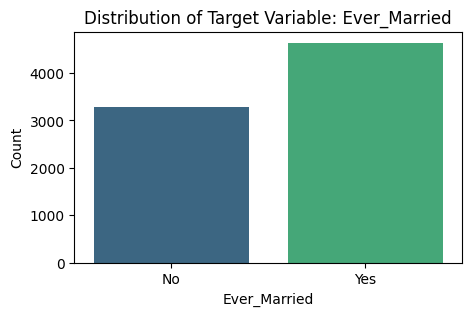

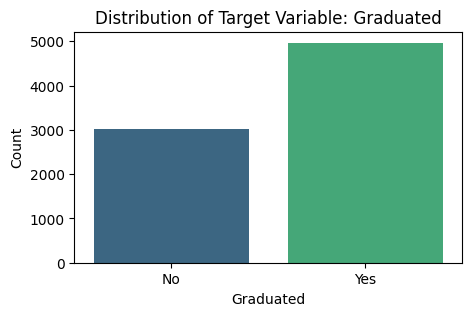

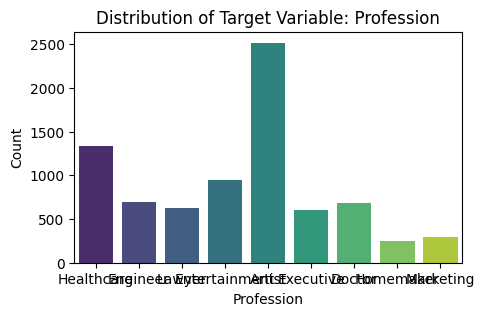

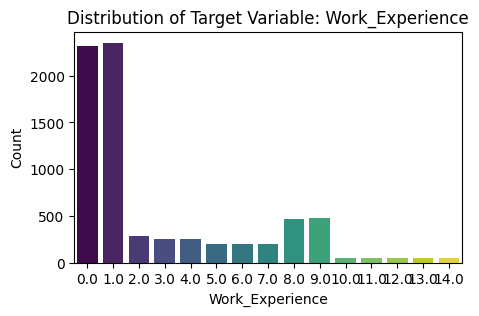

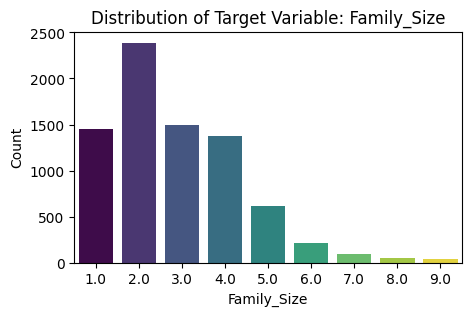

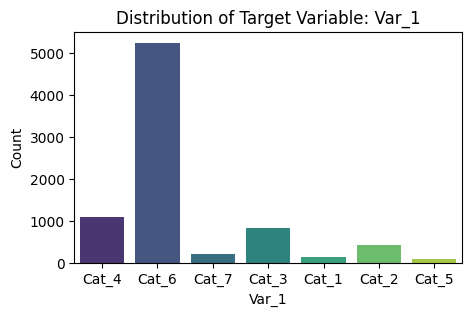

In [7]:
for column in null_df[null_df['null_percentage'] > 0].column_name.to_list():
  plt.figure(figsize=(5, 3))
  sns.countplot(x=column, data=df, palette='viridis',  hue=column, legend=False)
  plt.title(f'Distribution of Target Variable: {column}')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.show()



Оскільки пропущені значення в колонках Work_Experience та Family_Size мають дискретні значення, то заміняти їх середнім не дуже коректно, зате знаення моди не змінить суттєво наявний розподіл даних.

Для категоріальних колонок Ever_Married	та Graduated, значення яких Yes/No пропущені значення можна замінити тими, які зустрічаються найчастіше.

Profession і Var_1 мають явно виражені найбільші за значеннями категорії і невелику кількість пропущених значень, які теж можна замінити модою.

Отже, найпростішим рішенням буде замінити пропущені значення для всіх колонок з пропусками, значеннями, які зустрічаються найчастіше.

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Segmentation'])

# Створюємо трен. і вал. набори
input_cols = list(train_df.columns)[1:-1]
target_col = 'Segmentation'
X_train, y_train = train_df[input_cols].copy(), train_df[target_col].copy()
X_test, y_test = test_df[input_cols].copy(), test_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = df.iloc[:, 1:].select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.iloc[:, :-1].select_dtypes('object').columns.tolist()


In [9]:
#Impute missing numerical values
imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit(X_train[input_cols])
X_train.loc[:, input_cols] = imputer.transform(X_train[input_cols])
X_test.loc[:, input_cols] = imputer.transform(X_test[input_cols])

# Scale numeric features
scaler = MinMaxScaler().fit(X_train[numeric_cols])
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols]).astype(float)
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols]).astype(float)

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop = 'first', handle_unknown='ignore').fit(X_train[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
X_train.loc[:, encoded_cols] = encoder.transform(X_train[categorical_cols])
X_test.loc[:, encoded_cols] = encoder.transform(X_test[categorical_cols])

# Select the columns to be used for training/prediction
X_train = X_train[numeric_cols + encoded_cols]
X_test = X_test[numeric_cols + encoded_cols]

X_train.shape, X_test.shape

((6454, 22), (1614, 22))

In [10]:
display(X_train.head()), display(X_test.head())

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
917,0.197183,0.642857,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3398,0.760563,0.071429,0.125,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2045,0.211268,0.071429,0.375,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8060,0.422535,0.000000,0.625,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4604,0.140845,0.642857,0.000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
6862,0.323944,0.857143,0.250,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3396,0.042254,0.285714,0.375,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6302,0.253521,0.000000,0.000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3329,0.126761,0.000000,0.125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7901,0.000000,0.000000,0.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


(None, None)

**Завдання 2. Важливо уважно прочитати все формулювання цього завдання до кінця!**

Застосуйте методи ресемплингу даних SMOTE та SMOTE-Tomek з бібліотеки imbalanced-learn до тренувальної вибірки. В результаті у Вас має вийти 2 тренувальних набори: з апсемплингом зі SMOTE, та з ресамплингом з SMOTE-Tomek.

Увага! В нашому наборі даних є як категоріальні дані, так і звичайні числові. Базовий SMOTE не буде правильно працювати з категоріальними даними, але є його модифікація, яка буде. Тому в цього завдання є 2 виконання

  1. Застосувати SMOTE базовий лише на НЕкатегоріальних ознаках.

  2. Переглянути інформацію про метод [SMOTENC](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) і використати цей метод в цій задачі. За цей спосіб буде +3 бали за це завдання і він рекомендований для виконання.

  **Підказка**: аби скористатись SMOTENC треба створити змінну, яка містить індекси ознак, які є категоріальними (їх номер серед колонок) і передати при ініціації екземпляра класу `SMOTENC(..., categorical_features=cat_feature_indeces)`.
  
  Ви також можете розглянути варіант використання варіації SMOTE, який працює ЛИШЕ з категоріальними ознаками [SMOTEN](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTEN.html)

In [11]:
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTETomek

#SMOTENC resampling
encoded_col_indices = [X_train.columns.get_loc(col) for col in encoded_cols]

smotenc = SMOTENC(categorical_features=encoded_col_indices, random_state=42)
X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train, y_train)

#SMOTE-Tomek resampling
smotetomek = SMOTETomek(random_state=0)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)

# Створюємо словник, де ключі - це назви, а значення - результати value_counts()
counts_dict = {
    'y_train': y_train.value_counts(),
    'y_train_smotenc': y_train_smotenc.value_counts(),
    'y_train_smotetomek': y_train_smotetomek.value_counts()
}

# Виводимо DataFrame
display(pd.DataFrame(counts_dict))

,y_train,y_train_smotenc,y_train_smotetomek
Segmentation,,,
A,1578,1814,1386
B,1486,1814,1412
C,1576,1814,1479
D,1814,1814,1449


**Завдання 3**.
  1. Навчіть модель логістичної регресії з використанням стратегії One-vs-Rest з логістичною регресією на оригінальних даних, збалансованих з SMOTE, збалансованих з Smote-Tomek.  
  2. Виміряйте якість кожної з натренованих моделей використовуючи `sklearn.metrics.classification_report`.
  3. Напишіть, яку метрику ви обрали для порівняння моделей.
  4. Яка модель найкраща?
  5. Якщо немає суттєвої різниці між моделями - напишіть свою гіпотезу, чому?

In [12]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [13]:
f1_report = {}
def OneVsRestClass_report(X_train, y_train, name = ''):
  # OneVsRestClassifier
  ovr_clf = OneVsRestClassifier(LogisticRegression(solver='liblinear'))

  ovr_clf.fit(X_train, y_train)
  ovr_multilable_predictions = ovr_clf.predict(X_test)
  ovr_multilable_proba_predictions = ovr_clf.predict_proba(X_test)

  # Обчислимо метрики для кожного класу
  report_dict = classification_report(y_test, ovr_multilable_predictions, output_dict=True)
  report_df = pd.DataFrame(report_dict).transpose()

  f1_report[name] = report_df.loc[['A', 'B', 'C', 'D', 'macro avg', 'weighted avg'], 'f1-score']
  print(f'\nClassification report for {name}')
  display(report_df.round(2))

In [14]:
OneVsRestClass_report(X_train, y_train, name = 'Original_data')
OneVsRestClass_report(X_train_smotenc, y_train_smotenc, name = 'Smotenc balance')
OneVsRestClass_report(X_train_smotetomek, y_train_smotetomek, name = 'Smote-Tomek balance')


Classification report for Original_data


,precision,recall,f1-score,support
A,0.42,0.47,0.45,394.00
B,0.41,0.17,0.24,372.00
C,0.50,0.63,0.55,394.00
D,0.65,0.75,0.70,454.00
accuracy,0.52,0.52,0.52,0.52
macro avg,0.49,0.50,0.48,1614.00
weighted avg,0.50,0.52,0.50,1614.00



Classification report for Smotenc balance


,precision,recall,f1-score,support
A,0.42,0.48,0.45,394.00
B,0.41,0.26,0.32,372.00
C,0.52,0.59,0.55,394.00
D,0.67,0.71,0.69,454.00
accuracy,0.52,0.52,0.52,0.52
macro avg,0.51,0.51,0.50,1614.00
weighted avg,0.51,0.52,0.51,1614.00



Classification report for Smote-Tomek balance


,precision,recall,f1-score,support
A,0.42,0.51,0.46,394.00
B,0.40,0.24,0.30,372.00
C,0.50,0.58,0.54,394.00
D,0.69,0.69,0.69,454.00
accuracy,0.51,0.51,0.51,0.51
macro avg,0.50,0.50,0.50,1614.00
weighted avg,0.51,0.51,0.51,1614.00


In [15]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

# OneVsRestClassifier
ovr_clf_poly = OneVsRestClassifier(LogisticRegression(solver='newton-cg', penalty = 'l2', max_iter = 2000, C = 1))

ovr_clf_poly.fit(X_train_poly, y_train)
ovr_multilable_predictions_poly = ovr_clf_poly.predict(X_test_poly)
ovr_multilable_proba_predictions_poly = ovr_clf_poly.predict_proba(X_test_poly)

# Обчислимо метрики для кожного класу
report_dict = classification_report(y_test, ovr_multilable_predictions_poly, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

f1_report['Polynom features'] = report_df.loc[['A', 'B', 'C', 'D', 'macro avg', 'weighted avg'], 'f1-score']


In [16]:
print('F1_score report')
display( pd.DataFrame(f1_report).round(3))

F1_score report


,Original_data,Smotenc balance,Smote-Tomek balance,Polynom features
A,0.445,0.450,0.456,0.413
B,0.239,0.316,0.298,0.379
C,0.554,0.552,0.537,0.572
D,0.699,0.692,0.690,0.698
macro avg,0.484,0.503,0.495,0.516
weighted avg,0.496,0.512,0.505,0.524


In [17]:
y_train.value_counts(normalize=True).round(2)*100

,proportion
Segmentation,
D,28.0
A,24.0
C,24.0
B,23.0


**Висновки**:

Для оцінки якості моделей обрано F1_score.

Оскільки розподіл цільової змінної не має дуже вираженого дисбалансу класів, то і балансування несуттєво змінило значення метрики. При цьому Smotenc балансування покращило визначення класу В.

Додаваня поліноміальних ознак другого степеня без балансування класів дозволяє моделі більш рівномірно передбачати екземпляри різних класів і з трохи кращою якістю.

Потрібно ще поекспериментувати, щоб досягти кращого результату.